In [11]:
!pip install torch torchvision scikit-learn pandas matplotlib kaggle

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import classification_report, roc_auc_score

# Tải dữ liệu từ Kaggle
!kaggle datasets download -d mlg-ulb/creditcardfraud

# Giải nén dữ liệu
import zipfile
with zipfile.ZipFile("creditcardfraud.zip","r") as zip_ref:
    zip_ref.extractall()


Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)


In [13]:
# Đọc dữ liệu từ file CSV
data = pd.read_csv('creditcard.csv')

# Kiểm tra kích thước và thông tin của dữ liệu
print(data.shape)
print(data.info())

# Xem tóm tắt về dữ liệu
print(data.describe())

# Kiểm tra tỷ lệ gian lận trong tập dữ liệu
print("Tỷ lệ gian lận:", data['Class'].value_counts(normalize=True))

(284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 2

In [14]:
# Tách dữ liệu thành đặc trưng và nhãn
X = data.drop(columns=['Class'])
y = data['Class']

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Số lượng mẫu trong tập huấn luyện và tập kiểm tra
print(f"Số mẫu trong tập huấn luyện: {X_train.shape[0]}")
print(f"Số mẫu trong tập kiểm tra: {X_test.shape[0]}")

Số mẫu trong tập huấn luyện: 227845
Số mẫu trong tập kiểm tra: 56962


In [15]:
# Đọc dữ liệu từ file CSV
data = pd.read_csv('creditcard.csv')

# Kiểm tra kích thước và thông tin của dữ liệu
print(data.shape)
print(data.info())

# Tách dữ liệu thành đặc trưng và nhãn
X = data.drop(columns=['Class'])
y = data['Class']

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Chuyển đổi sang tensor
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Tạo DataLoader
train_loader = DataLoader(TensorDataset(X_train_tensor, X_train_tensor), batch_size=32, shuffle=True)


(284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 2

In [16]:
class VAE(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(VAE, self).__init__()
        self.fc1 = nn.Linear(input_dim, 16)
        self.fc2_mu = nn.Linear(16, latent_dim)
        self.fc2_logvar = nn.Linear(16, latent_dim)
        self.fc3 = nn.Linear(latent_dim, 16)
        self.fc4 = nn.Linear(16, input_dim)

    def encode(self, x):
        h = torch.relu(self.fc1(x))
        return self.fc2_mu(h), self.fc2_logvar(h)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h = torch.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(h))

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

# Khởi tạo mô hình VAE
input_dim = X_train.shape[1]
latent_dim = 5
model = VAE(input_dim, latent_dim)
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [17]:
def loss_function(recon_x, x, mu, logvar):
    BCE = nn.functional.mse_loss(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

# Huấn luyện mô hình
epochs = 20
model.train()
for epoch in range(epochs):
    train_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        loss = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {train_loss / len(train_loader.dataset)}')


Epoch 1, Loss: 30.247734626378747
Epoch 2, Loss: 30.07021156764255
Epoch 3, Loss: 30.070101966381586
Epoch 4, Loss: 30.07007363179241
Epoch 5, Loss: 30.0701648156558
Epoch 6, Loss: 30.070091780137847
Epoch 7, Loss: 30.070070715648935
Epoch 8, Loss: 30.07008364237373
Epoch 9, Loss: 30.0700931829593
Epoch 10, Loss: 30.07007874897327
Epoch 11, Loss: 30.070068730087662
Epoch 12, Loss: 30.070069094839994
Epoch 13, Loss: 30.07007137483505
Epoch 14, Loss: 30.070080962182452
Epoch 15, Loss: 30.070070563191635
Epoch 16, Loss: 30.070075622845227
Epoch 17, Loss: 30.0700645663258
Epoch 18, Loss: 30.07006906480393
Epoch 19, Loss: 30.070086133090022
Epoch 20, Loss: 30.070076680570057


In [18]:
# Đặt mô hình vào chế độ đánh giá
model.eval()
with torch.no_grad():
    X_test_pred, _, _ = model(X_test_tensor)
    reconstruction_loss = torch.mean((X_test_tensor - X_test_pred) ** 2, dim=1).numpy()

# Thiết lập ngưỡng phát hiện bất thường
threshold = np.percentile(reconstruction_loss, 80)

# Gán nhãn bất thường dựa trên ngưỡng
y_pred = (reconstruction_loss > threshold).astype(int)

# Đánh giá mô hình
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, reconstruction_loss))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95     56864
           1       0.02      0.92      0.03        98

    accuracy                           0.90     56962
   macro avg       0.51      0.91      0.49     56962
weighted avg       1.00      0.90      0.95     56962

ROC AUC Score: 0.9607969031731994


In [19]:
# Tạo DataFrame chứa kết quả so sánh
results_df = pd.DataFrame({
    'reconstruction_loss': reconstruction_loss,
    'predicted_anomaly': y_pred,
    'actual_label': y_test.values  # Nhãn thực tế từ dữ liệu
})

# Hiển thị các giao dịch mà mô hình đánh dấu là gian lận và so sánh với nhãn thực tế
fraud_cases = results_df[results_df['predicted_anomaly'] == 1]
print(fraud_cases.head())  # Hiển thị một số giao dịch bị dự đoán là gian lận

    reconstruction_loss  predicted_anomaly  actual_label
0             63.918018                  1             1
9              2.534940                  1             0
15             1.694268                  1             0
16             1.648854                  1             0
31             2.520205                  1             0


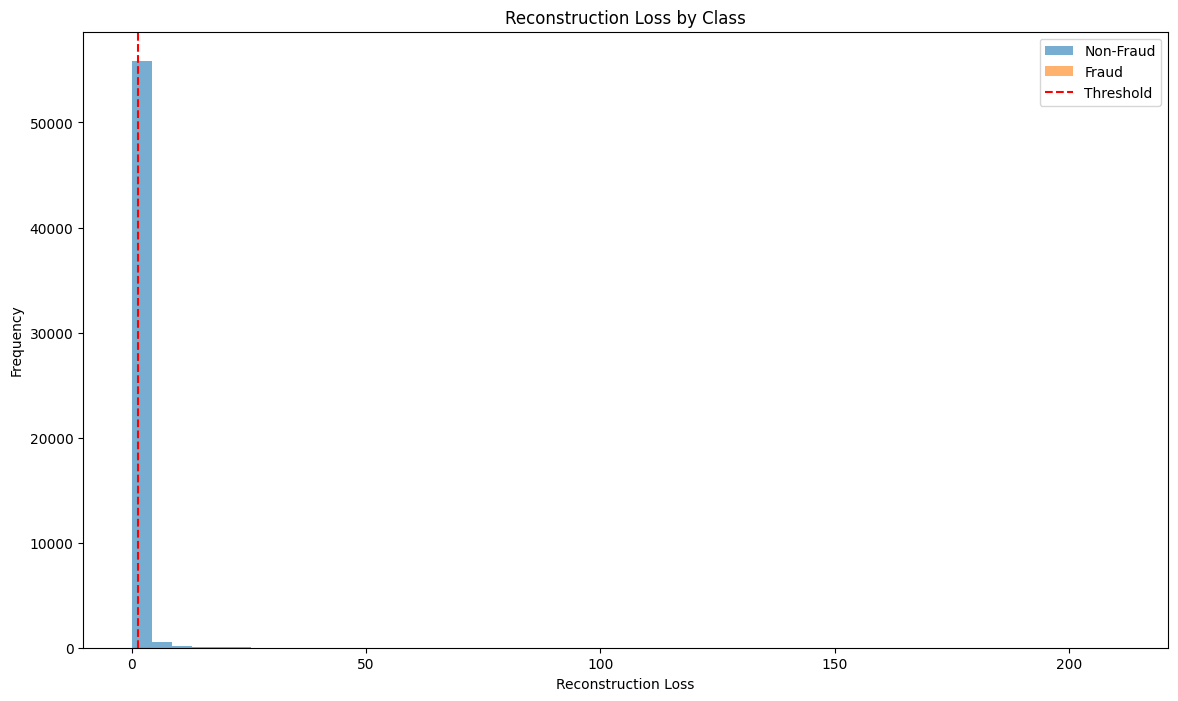

In [20]:
plt.figure(figsize=(14, 8))
plt.hist(reconstruction_loss[y_test == 0], bins=50, alpha=0.6, label='Non-Fraud')
plt.hist(reconstruction_loss[y_test == 1], bins=50, alpha=0.6, label='Fraud')
plt.axvline(threshold, color='r', linestyle='--', label='Threshold')
plt.title('Reconstruction Loss by Class')
plt.xlabel('Reconstruction Loss')
plt.ylabel('Frequency')
plt.legend()
plt.show()
